# PRÁCTICA 3

In [25]:
from skimage import io, filters, morphology, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np

## Leer y representar la imagen

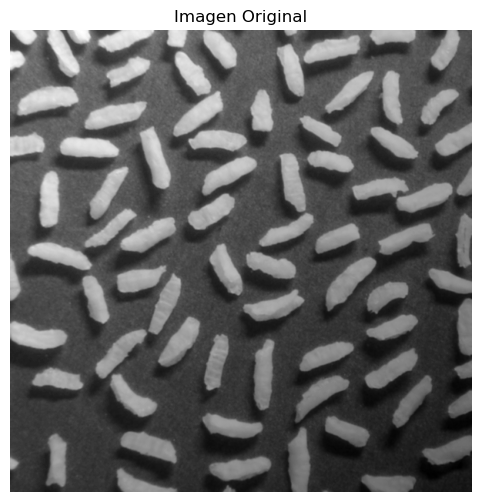

In [31]:
imagen_path = "images/riceBGgradient.tif"  # Cambia por la ruta a tu archivo
imagen = io.imread(imagen_path)  # Cargamos la imagen en escala de grises

# Mostrar la imagen original
plt.figure(figsize=(6, 6))
plt.title("Imagen Original")
plt.imshow(imagen, cmap="gray")
plt.axis("off")
plt.show()

## Separar los granos del fondo con un umbral global

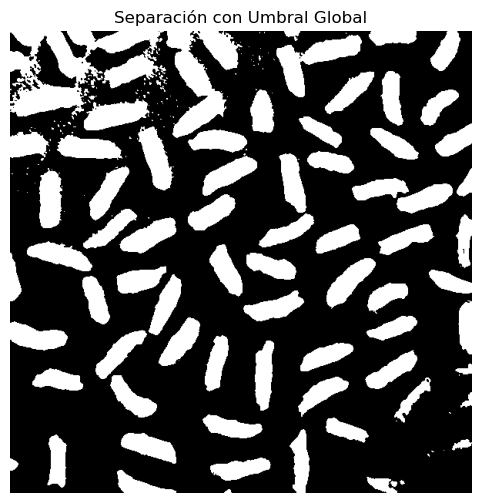

In [27]:
umbral_global = 128  # Umbral inicial arbitrario (puedes ajustarlo si es necesario)
granos_umbral = imagen > umbral_global  # Separar los granos aplicando el umbral

# Mostrar el resultado de la segmentación con umbral global
plt.figure(figsize=(6, 6))
plt.title("Separación con Umbral Global")
plt.imshow(granos_umbral, cmap="gray")  # Visualizamos la imagen segmentada
plt.axis("off")  # Ocultamos los ejes
plt.show()


## Corregir la iluminación con una transformación morfológica top-hat

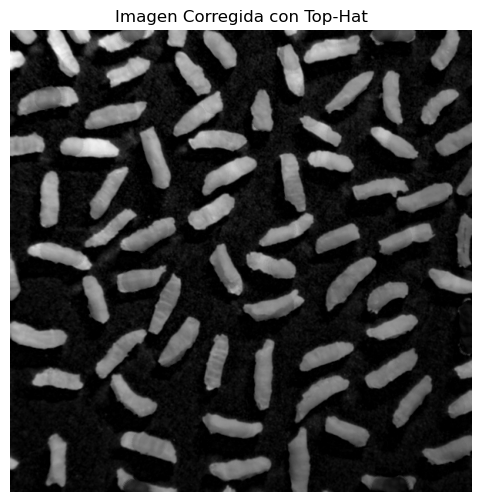

In [28]:
# La transformación top-hat se utiliza para corregir la diferencia de iluminación en la imagen
# Creamos un elemento estructurante en forma de disco, que nos ayuda a capturar variaciones locales de la iluminación
elemento_estructurante = morphology.disk(15)  # El tamaño del disco puede ajustarse según sea necesario
imagen_tophat = morphology.white_tophat(imagen, footprint=elemento_estructurante)  # Aplicamos la transformación top-hat

# Mostrar la imagen corregida con la transformación top-hat
plt.figure(figsize=(6, 6))
plt.title("Imagen Corregida con Top-Hat")
plt.imshow(imagen_tophat, cmap="gray")  # Visualizamos la imagen con iluminación corregida
plt.axis("off")  # Ocultamos los ejes
plt.show()

## Buscar un umbral óptimo con Otsu

Umbral encontrado con Otsu: 37


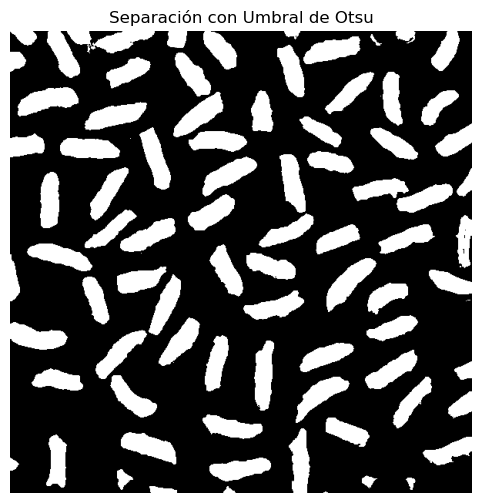

In [29]:
# Utilizamos el método de Otsu para calcular automáticamente el umbral óptimo para la segmentación
umbral_otsu = filters.threshold_otsu(imagen_tophat)  # Calculamos el umbral de Otsu
print(f"Umbral encontrado con Otsu: {umbral_otsu}")  # Mostramos el valor del umbral

# Aplicar el umbral calculado por Otsu para segmentar los granos
granos_segmentados = imagen_tophat > umbral_otsu  # Segmentación de la imagen basada en el umbral de Otsu

# Mostrar la imagen final con la segmentación basada en Otsu
plt.figure(figsize=(6, 6))
plt.title("Separación con Umbral de Otsu")
plt.imshow(granos_segmentados, cmap="gray")  # Visualizamos la segmentación final
plt.axis("off")  # Ocultamos los ejes
plt.show()
